In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

# Read the red wine dataset
df_red = pd.read_csv(r'C:\Users\Ommo Clark\Downloads\red_wine.csv')

# Generate the profiling report
profile_red = ProfileReport(df_red, title="Red Wine Profiling Report")

# Display the report within the Jupyter Notebook
profile_red.to_notebook_iframe()

# Optionally, save the report to an HTML file
profile_red.to_file("red_wine_profile.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline


In [5]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Ommo Clark\Downloads\red_wine.csv')

# Check for missing values
print(df.isnull().sum())

# Preview the dataset
print(df.head())


citric acid    0
sulphates      0
alcohol        0
type           0
dtype: int64
   citric acid  sulphates  alcohol  type
0         0.49       0.63      8.0   low
1         0.66       0.57      8.3   low
2         0.23       0.44      8.5  high
3         0.44       0.84      8.6   low
4         0.08       0.50      8.7   low


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [9]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Ommo Clark\Downloads\red_wine.csv')

# Preview the dataset
print("Columns in DataFrame:", df.columns)
print(df.head())


Columns in DataFrame: Index(['citric acid', 'sulphates', 'alcohol', 'type'], dtype='object')
   citric acid  sulphates  alcohol  type
0         0.49       0.63      8.0   low
1         0.66       0.57      8.3   low
2         0.23       0.44      8.5  high
3         0.44       0.84      8.6   low
4         0.08       0.50      8.7   low


In [11]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df['type'])  # 'high' -> 0 or 1, 'low' -> 1 or 0
print("Encoded classes:", le.classes_)


Encoded classes: ['high' 'low']


In [13]:
X = df.drop('type', axis=1)


In [15]:
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 citric acid    0
sulphates      0
alcohol        0
type           0
dtype: int64


In [17]:
# Stratified K-Fold to maintain class distribution
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [19]:
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score

# Define scoring functions
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc'
}


In [21]:
# Most frequent class predictor
dummy_clf = DummyClassifier(strategy='most_frequent')
scores = cross_validate(dummy_clf, X, y, cv=kf, scoring=scoring)
baseline_accuracy = np.mean(scores['test_accuracy'])


In [23]:
# Uniform random predictions
dummy_clf_random = DummyClassifier(strategy='uniform')
scores = cross_validate(dummy_clf_random, X, y, cv=kf, scoring=scoring)
baseline_auc = np.mean(scores['test_roc_auc'])


In [25]:
def evaluate_model(model, X, y, cv, scoring):
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    mean_accuracy = np.mean(scores['test_accuracy'])
    mean_auc = np.mean(scores['test_roc_auc'])
    return mean_accuracy, mean_auc


In [27]:
# Feature scaling is beneficial for logistic regression
model = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])
lr_accuracy, lr_auc = evaluate_model(model, X, y, kf, scoring)
print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}, AUC: {lr_auc:.4f}")


Logistic Regression - Accuracy: 0.7949, AUC: 0.8769


In [29]:
model = GaussianNB()
nb_accuracy, nb_auc = evaluate_model(model, X, y, kf, scoring)
print(f"Naive Bayes - Accuracy: {nb_accuracy:.4f}, AUC: {nb_auc:.4f}")


Naive Bayes - Accuracy: 0.8248, AUC: 0.8933


In [31]:
model = DecisionTreeClassifier(random_state=42)
dt_accuracy, dt_auc = evaluate_model(model, X, y, kf, scoring)
print(f"Decision Tree - Accuracy: {dt_accuracy:.4f}, AUC: {dt_auc:.4f}")


Decision Tree - Accuracy: 0.7984, AUC: 0.7971


In [33]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', probability=True))
])
svm_linear_accuracy, svm_linear_auc = evaluate_model(model, X, y, kf, scoring)
print(f"SVM Linear - Accuracy: {svm_linear_accuracy:.4f}, AUC: {svm_linear_auc:.4f}")


SVM Linear - Accuracy: 0.7861, AUC: 0.8774


In [35]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', probability=True))
])
svm_rbf_accuracy, svm_rbf_auc = evaluate_model(model, X, y, kf, scoring)
print(f"SVM RBF - Accuracy: {svm_rbf_accuracy:.4f}, AUC: {svm_rbf_auc:.4f}")


SVM RBF - Accuracy: 0.8405, AUC: 0.9246


In [37]:
model = RandomForestClassifier(random_state=42)
rf_accuracy, rf_auc = evaluate_model(model, X, y, kf, scoring)
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, AUC: {rf_auc:.4f}")


Random Forest - Accuracy: 0.8404, AUC: 0.9180


In [39]:
results = pd.DataFrame({
    'Model': ['Baseline', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'SVM Linear', 'SVM RBF', 'Random Forest'],
    'Accuracy': [baseline_accuracy, lr_accuracy, nb_accuracy, dt_accuracy, svm_linear_accuracy, svm_rbf_accuracy, rf_accuracy],
    'AUC': [baseline_auc, lr_auc, nb_auc, dt_auc, svm_linear_auc, svm_rbf_auc, rf_auc]
})

print(results)


                 Model  Accuracy       AUC
0             Baseline  0.528887  0.500000
1  Logistic Regression  0.794858  0.876921
2          Naive Bayes  0.824773  0.893291
3        Decision Tree  0.798397  0.797081
4           SVM Linear  0.786086  0.877413
5              SVM RBF  0.840502  0.924598
6        Random Forest  0.840381  0.918031


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv(r'C:\Users\Ommo Clark\Downloads\red_wine.csv')

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df['type'])  # 'high' -> 0 or 1, 'low' -> 1 or 0
print("Encoded classes:", le.classes_)

# Prepare features
X = df.drop('type', axis=1)

# Define cross-validation strategy
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc'}

# Initialize a results dictionary
results = {
    'Model': [],
    'Accuracy': [],
    'AUC': []
}

# Baseline model - Majority class predictor
dummy_clf = DummyClassifier(strategy='most_frequent')
scores = cross_validate(dummy_clf, X, y, cv=kf, scoring=scoring)
baseline_accuracy = np.mean(scores['test_accuracy'])
baseline_auc = 0.5  # For a random classifier, AUC is approximately 0.5

# Append results
results['Model'].append('Baseline')
results['Accuracy'].append(baseline_accuracy)
results['AUC'].append(baseline_auc)

# Function to evaluate models
def evaluate_model(name, model, X, y, cv, scoring):
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    mean_accuracy = np.mean(scores['test_accuracy'])
    mean_auc = np.mean(scores['test_roc_auc'])
    # Append results
    results['Model'].append(name)
    results['Accuracy'].append(mean_accuracy)
    results['AUC'].append(mean_auc)

# Logistic Regression
model_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])
evaluate_model('Logistic Regression', model_lr, X, y, kf, scoring)

# Naive Bayes
model_nb = GaussianNB()
evaluate_model('Naive Bayes', model_nb, X, y, kf, scoring)

# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
evaluate_model('Decision Tree', model_dt, X, y, kf, scoring)

# SVM Linear
model_svm_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', probability=True))
])
evaluate_model('SVM-Linear', model_svm_linear, X, y, kf, scoring)

# SVM RBF
model_svm_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', probability=True))
])
evaluate_model('SVM-RBF', model_svm_rbf, X, y, kf, scoring)

# Random Forest
model_rf = RandomForestClassifier(random_state=42)
evaluate_model('Random Forest', model_rf, X, y, kf, scoring)


Encoded classes: ['high' 'low']


In [43]:
# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Reorder the columns to match the specified format
results_df = results_df[['Model', 'AUC', 'Accuracy']]

# Display the results table
print(results_df)


                 Model       AUC  Accuracy
0             Baseline  0.500000  0.528887
1  Logistic Regression  0.876921  0.794858
2          Naive Bayes  0.893291  0.824773
3        Decision Tree  0.797081  0.798397
4           SVM-Linear  0.877413  0.786086
5              SVM-RBF  0.924598  0.840502
6        Random Forest  0.918031  0.840381


In [45]:
%matplotlib inline


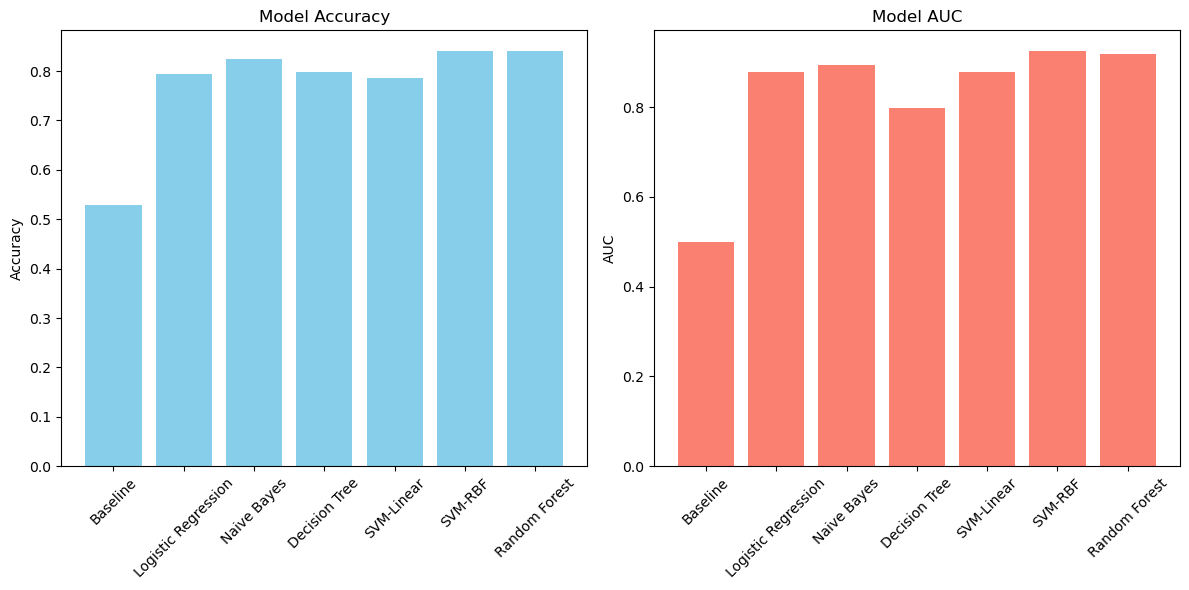

In [47]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

# Plot AUC
plt.subplot(1, 2, 2)
plt.bar(results_df['Model'], results_df['AUC'], color='salmon')
plt.title('Model AUC')
plt.xticks(rotation=45)
plt.ylabel('AUC')

plt.tight_layout()
# plt.show()  # Comment out or remove this line


Random Forest ROC AUC: 0.9208


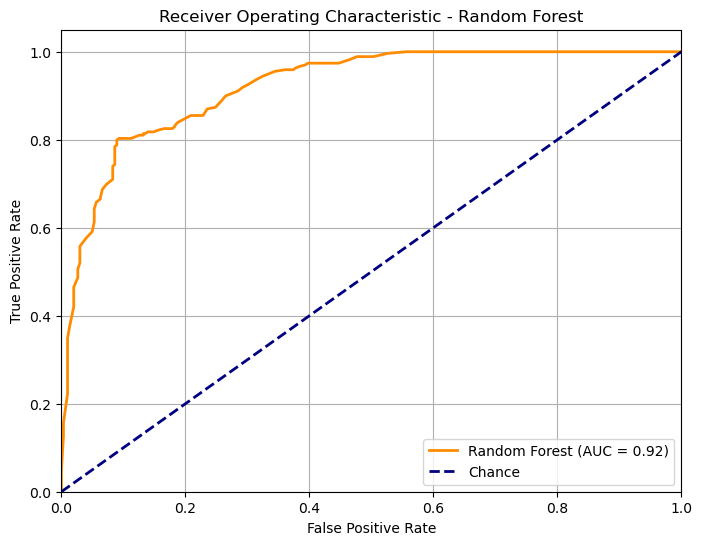

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# %matplotlib inline  # Uncomment if needed

# Load the dataset
df = pd.read_csv(r'C:\Users\Ommo Clark\Downloads\red_wine.csv')

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df['type'])  # Assuming 'type' is the target variable

# Prepare features
X = df.drop('type', axis=1)

# Define cross-validation strategy
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Get predicted probabilities using cross-validation
y_proba = cross_val_predict(
    rf_model, X, y, cv=kf, method='predict_proba', n_jobs=-1
)

# Compute ROC curve and ROC area
y_scores = y_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)
print(f'Random Forest ROC AUC: {roc_auc:.4f}')

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr,
    tpr,
    color='darkorange',
    lw=2,
    label=f'Random Forest (AUC = {roc_auc:.2f})'
)
plt.plot(
    [0, 1],
    [0, 1],
    color='navy',
    lw=2,
    linestyle='--',
    label='Chance'
)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [51]:
plt.savefig('random_forest_roc_curve.png', dpi=300)


<Figure size 640x480 with 0 Axes>

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load the red wine dataset
df_red = pd.read_csv(r'C:\Users\Ommo Clark\Downloads\red_wine.csv')

# Load the white wine dataset
df_white = pd.read_csv(r'C:\Users\Ommo Clark\Downloads\white_wine.csv')

# Define the feature columns (ensure they are consistent across both datasets)
feature_columns = ['citric acid', 'sulphates', 'alcohol']  # Adjust as per your dataset

# Encode the target variable in red wine data
le = LabelEncoder()
y_red = le.fit_transform(df_red['type'])  # 'high' -> 0 or 1, 'low' -> 1 or 0

# Prepare features for red wine data
X_red = df_red[feature_columns]

# Encode the target variable in white wine data
y_white = le.transform(df_white['type'])  # Use the same LabelEncoder

# Prepare features for white wine data
X_white = df_white[feature_columns]

# Initialize and train the Random Forest model on red wine data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_red, y_red)

# Predict probabilities on white wine data
y_proba_white = rf_model.predict_proba(X_white)[:, 1]

# Compute ROC AUC score on white wine data
roc_auc_white = roc_auc_score(y_white, y_proba_white)
print(f'Random Forest ROC AUC on White Wine Data: {roc_auc_white:.4f}')


Random Forest ROC AUC on White Wine Data: 0.9740


In [55]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define cross-validation strategy
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Random Forest model
rf_model_white = RandomForestClassifier(random_state=42)

# Perform cross-validation on white wine data
cv_scores = cross_val_score(rf_model_white, X_white, y_white, cv=kf, scoring='roc_auc')

# Compute mean ROC AUC score
mean_auc_white_cv = np.mean(cv_scores)
print(f'Random Forest ROC AUC on White Wine Data (Cross-Validation): {mean_auc_white_cv:.4f}')


Random Forest ROC AUC on White Wine Data (Cross-Validation): 0.9958


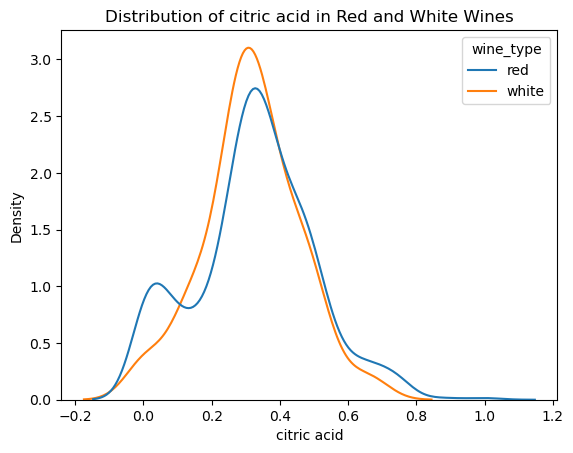

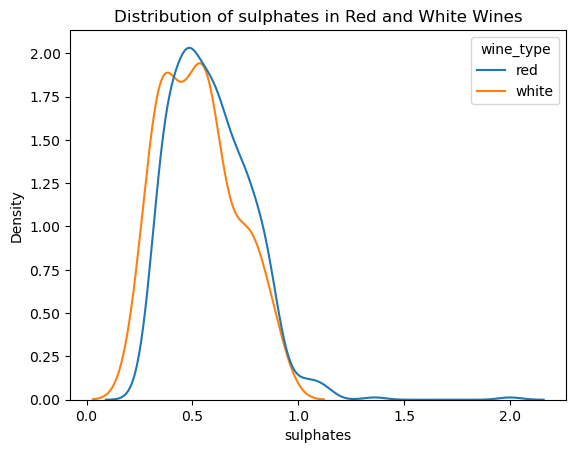

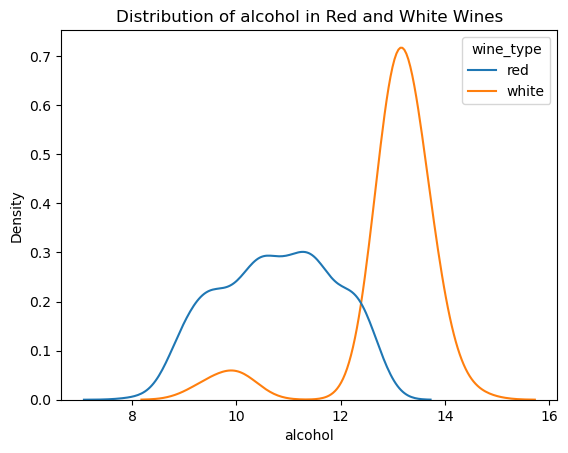

In [57]:
import seaborn as sns

# Combine datasets for comparison
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'
df_combined = pd.concat([df_red, df_white], ignore_index=True)

# Plot distributions
for feature in feature_columns:
    sns.kdeplot(data=df_combined, x=feature, hue='wine_type', common_norm=False)
    plt.title(f'Distribution of {feature} in Red and White Wines')
    plt.show()
